## Import Library

In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import geopandas as gpd
import folium
import os
import map

warnings.filterwarnings("ignore")

## Read Data

In [19]:
data = pd.read_csv('./dataset/merged_clean_data.csv')

## Visualization

### Geographical Influence on Academic Performance:

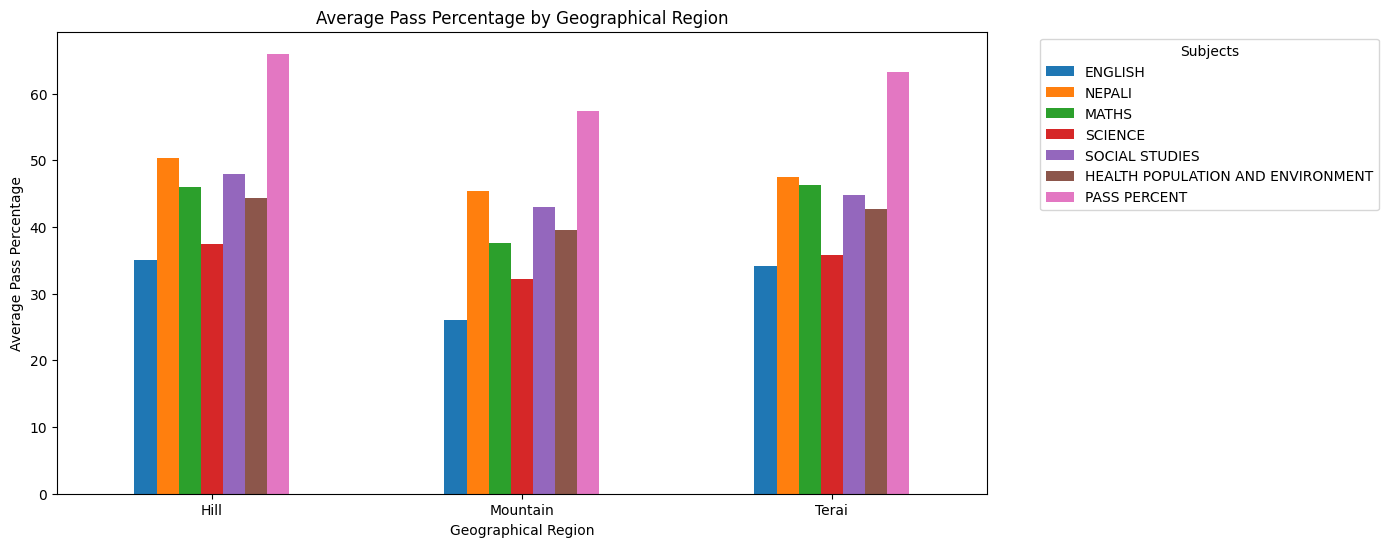

In [20]:
# Select only the relevant numeric columns for analysis
subjects = ['ENGLISH', 'NEPALI', 'MATHS', 'SCIENCE', 'SOCIAL STUDIES', 'HEALTH POPULATION AND ENVIRONMENT', 'PASS PERCENT']
numeric_data = data[subjects + ['Geographical Region']]

# Ensure all subject columns are numeric
numeric_data[subjects] = numeric_data[subjects].apply(pd.to_numeric, errors='coerce')

# Handle missing values by filling with the mean
numeric_data[subjects] = numeric_data[subjects].fillna(numeric_data[subjects].mean())

# Group by Geographical Region and calculate mean pass percentage for each subject
geo_group = numeric_data.groupby('Geographical Region').mean()

# Plotting
ax = geo_group[subjects].plot(kind='bar', figsize=(12, 6))
plt.title('Average Pass Percentage by Geographical Region')
plt.ylabel('Average Pass Percentage')
plt.xlabel('Geographical Region')
plt.xticks(rotation=0)
plt.legend(title='Subjects', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### School Performance by Development Region:

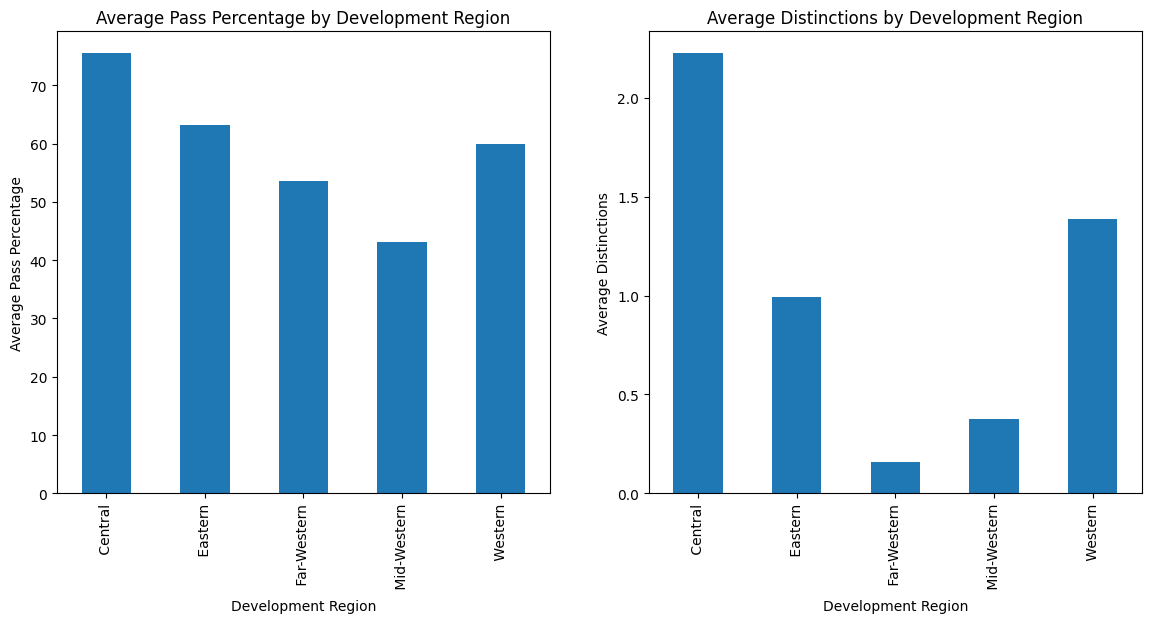

In [21]:
# Select only the relevant numeric columns for analysis
numeric_data = data[['PASS PERCENT', 'DISTINCTION', 'Development Region']]

# Ensure all columns are numeric
numeric_data[['PASS PERCENT', 'DISTINCTION']] = numeric_data[['PASS PERCENT', 'DISTINCTION']].apply(pd.to_numeric, errors='coerce')

# Handle missing values by filling with the mean
numeric_data[['PASS PERCENT', 'DISTINCTION']] = numeric_data[['PASS PERCENT', 'DISTINCTION']].fillna(numeric_data[['PASS PERCENT', 'DISTINCTION']].mean())

# Group by Development Region and calculate mean pass percentage and distinctions
dev_group = numeric_data.groupby('Development Region').mean()

# Plotting
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
dev_group['PASS PERCENT'].plot(kind='bar', ax=ax[0], title='Average Pass Percentage by Development Region')
dev_group['DISTINCTION'].plot(kind='bar', ax=ax[1], title='Average Distinctions by Development Region')
ax[0].set_ylabel('Average Pass Percentage')
ax[1].set_ylabel('Average Distinctions')
plt.show()

### Subject-wise Performance Analysis:

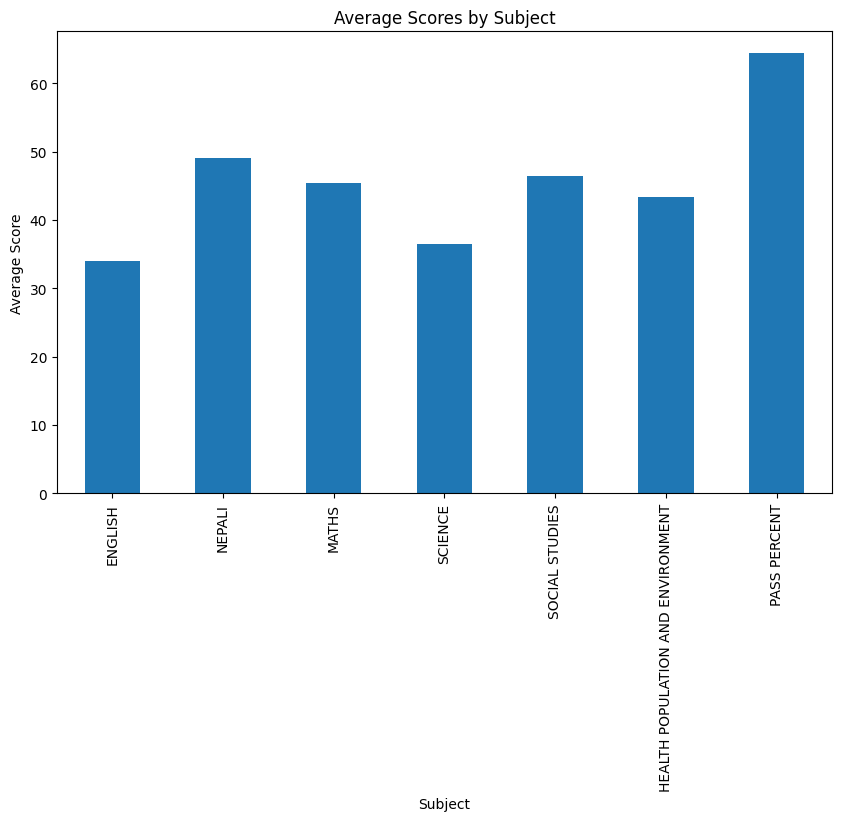

In [23]:
# Calculate mean scores for each subject
subject_means = data[subjects].mean()

# Plotting
subject_means.plot(kind='bar', figsize=(10, 6))
plt.title('Average Scores by Subject')
plt.ylabel('Average Score')
plt.xlabel('Subject')
plt.xticks(rotation=90)
plt.show()

### Impact of School Size on Academic Outcomes:

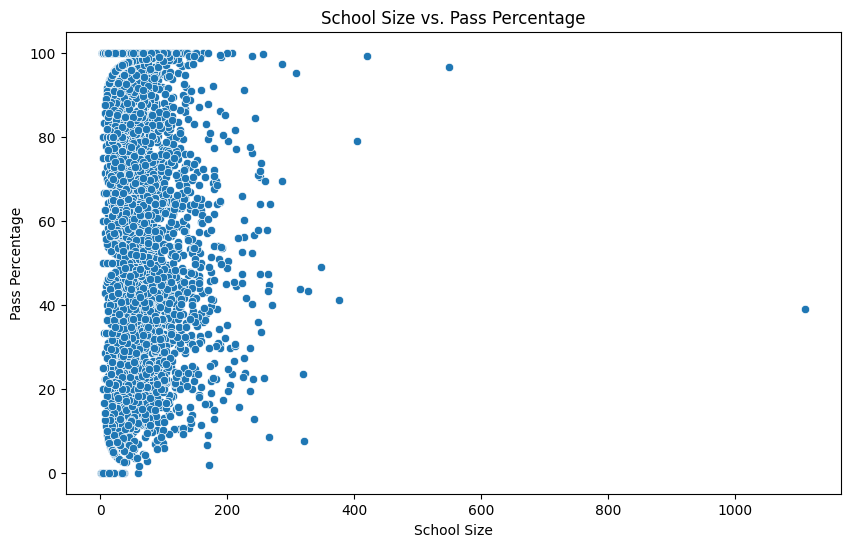

In [24]:
# Calculate the size of the school by adding PASS and FAIL
data['School Size'] = data['PASS'] + data['FAIL']

# Plotting
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='School Size', y='PASS PERCENT')
plt.title('School Size vs. Pass Percentage')
plt.xlabel('School Size')
plt.ylabel('Pass Percentage')
plt.show()

### Correlation between Pass Percent and Division Rates:

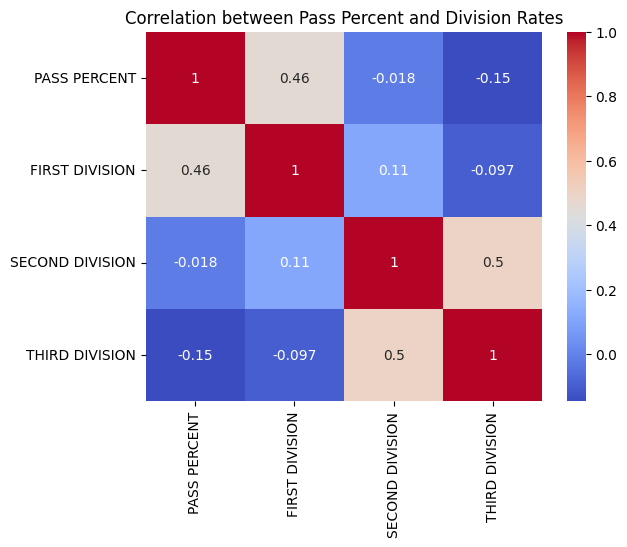

In [25]:
# Correlation matrix
correlation_matrix = data[['PASS PERCENT', 'FIRST DIVISION', 'SECOND DIVISION', 'THIRD DIVISION']].corr()

# Plotting
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation between Pass Percent and Division Rates')
plt.show()


## Interactive Maps

In [38]:
# Path to the folder containing GeoJSON files
folder_path = './districts_geojson'

In [39]:
# List to store GeoDataFrames
gdfs = []

# Loop through all files in the folder
for file_name in os.listdir(folder_path):
    if file_name.endswith('.geojson'):
        # Read GeoJSON file and append to the list
        gdf = gpd.read_file(os.path.join(folder_path, file_name))
        gdfs.append(gdf)

In [40]:
# Concatenate all GeoDataFrames into a single GeoDataFrame
merged_gdf = gpd.GeoDataFrame(pd.concat(gdfs, ignore_index=True), crs=gdfs[0].crs)
merged_gdf

,DISTRICT,HQ,PROVINCE,geometry
0,ACHHAM,MANGALSEN,7,"POLYGON ((81.15565 29.38523, 81.15656 29.38500..."
1,ARGHAKHANCHI,SANDHIKHARKA,5,"POLYGON ((83.05411 28.11412, 83.05424 28.11348..."
2,BAGLUNG,BAGLUNG,4,"POLYGON ((82.88411 28.47579, 82.88486 28.47713..."
3,BAITADI,DASHARATHCHAND,7,"POLYGON ((80.41054 29.60320, 80.41209 29.60366..."
4,BAJHANG,JAYAPRITHVI,7,"POLYGON ((81.09295 30.05481, 81.09334 30.05366..."
...,...,...,...,...
72,TANAHU,BYAS,4,"POLYGON ((84.00539 28.11588, 84.00766 28.11244..."
73,TAPLEJUNG,TAPLEJUNG,1,"POLYGON ((87.66631 27.80776, 87.67083 27.80748..."
74,TEHRATHUM,MYANGLUNG,1,"POLYGON ((87.51917 27.29740, 87.52326 27.29481..."
75,UDAYAPUR,TRIYUGA,1,"POLYGON ((86.43436 27.14983, 86.43620 27.15001..."


In [42]:
map = map.Map()

In [43]:
map.mergeDF(data)

,DISTRICT,HQ,PROVINCE,geometry,index,Zone,Development Region,Geographical Region,Latitude,Longitude,...,TAP,SAP,DISTINCTION,FIRST DIVISION,SECOND DIVISION,THIRD DIVISION,PASS,FAIL,PASS PERCENT,School Size
0,ACHHAM,MANGALSEN,7,"POLYGON ((81.15565 29.38523, 81.15656 29.38500...",4909,Seti,Far-Western,Hill,29.111375,81.298828,...,20,19,0,0,2,1,3,16,15.8,19
1,ACHHAM,MANGALSEN,7,"POLYGON ((81.15565 29.38523, 81.15656 29.38500...",4910,Seti,Far-Western,Hill,29.111375,81.298828,...,125,125,0,7,39,1,47,78,37.6,125
2,ACHHAM,MANGALSEN,7,"POLYGON ((81.15565 29.38523, 81.15656 29.38500...",4911,Seti,Far-Western,Hill,29.111375,81.298828,...,144,143,0,11,53,4,68,75,47.6,143
3,ACHHAM,MANGALSEN,7,"POLYGON ((81.15565 29.38523, 81.15656 29.38500...",4912,Seti,Far-Western,Hill,29.111375,81.298828,...,87,87,0,4,50,0,54,33,62.1,87
4,ACHHAM,MANGALSEN,7,"POLYGON ((81.15565 29.38523, 81.15656 29.38500...",4913,Seti,Far-Western,Hill,29.111375,81.298828,...,123,121,0,6,30,3,39,82,32.2,121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5420,UDAYAPUR,TRIYUGA,1,"POLYGON ((86.43436 27.14983, 86.43620 27.15001...",974,Sagarmatha,Eastern,Hill,26.916667,86.666667,...,25,25,0,1,23,0,24,1,96.0,25
5421,UDAYAPUR,TRIYUGA,1,"POLYGON ((86.43436 27.14983, 86.43620 27.15001...",975,Sagarmatha,Eastern,Hill,26.916667,86.666667,...,14,14,0,12,2,0,14,0,100.0,14
5422,UDAYAPUR,TRIYUGA,1,"POLYGON ((86.43436 27.14983, 86.43620 27.15001...",976,Sagarmatha,Eastern,Hill,26.916667,86.666667,...,12,12,5,7,0,0,12,0,100.0,12
5423,UDAYAPUR,TRIYUGA,1,"POLYGON ((86.43436 27.14983, 86.43620 27.15001...",977,Sagarmatha,Eastern,Hill,26.916667,86.666667,...,6,6,2,3,1,0,6,0,100.0,6


In [46]:
map.map_gdfs

,DISTRICT,HQ,PROVINCE,geometry,index,Zone,Development Region,Geographical Region,Latitude,Longitude,...,TAP,SAP,DISTINCTION,FIRST DIVISION,SECOND DIVISION,THIRD DIVISION,PASS,FAIL,PASS PERCENT,School Size
0,ACHHAM,MANGALSEN,7,"POLYGON ((81.15565 29.38523, 81.15656 29.38500...",4909,Seti,Far-Western,Hill,29.111375,81.298828,...,20,19,0,0,2,1,3,16,15.8,19
1,ACHHAM,MANGALSEN,7,"POLYGON ((81.15565 29.38523, 81.15656 29.38500...",4910,Seti,Far-Western,Hill,29.111375,81.298828,...,125,125,0,7,39,1,47,78,37.6,125
2,ACHHAM,MANGALSEN,7,"POLYGON ((81.15565 29.38523, 81.15656 29.38500...",4911,Seti,Far-Western,Hill,29.111375,81.298828,...,144,143,0,11,53,4,68,75,47.6,143
3,ACHHAM,MANGALSEN,7,"POLYGON ((81.15565 29.38523, 81.15656 29.38500...",4912,Seti,Far-Western,Hill,29.111375,81.298828,...,87,87,0,4,50,0,54,33,62.1,87
4,ACHHAM,MANGALSEN,7,"POLYGON ((81.15565 29.38523, 81.15656 29.38500...",4913,Seti,Far-Western,Hill,29.111375,81.298828,...,123,121,0,6,30,3,39,82,32.2,121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5420,UDAYAPUR,TRIYUGA,1,"POLYGON ((86.43436 27.14983, 86.43620 27.15001...",974,Sagarmatha,Eastern,Hill,26.916667,86.666667,...,25,25,0,1,23,0,24,1,96.0,25
5421,UDAYAPUR,TRIYUGA,1,"POLYGON ((86.43436 27.14983, 86.43620 27.15001...",975,Sagarmatha,Eastern,Hill,26.916667,86.666667,...,14,14,0,12,2,0,14,0,100.0,14
5422,UDAYAPUR,TRIYUGA,1,"POLYGON ((86.43436 27.14983, 86.43620 27.15001...",976,Sagarmatha,Eastern,Hill,26.916667,86.666667,...,12,12,5,7,0,0,12,0,100.0,12
5423,UDAYAPUR,TRIYUGA,1,"POLYGON ((86.43436 27.14983, 86.43620 27.15001...",977,Sagarmatha,Eastern,Hill,26.916667,86.666667,...,6,6,2,3,1,0,6,0,100.0,6


In [47]:
m = folium.Map(location=[28.3949, 84.1240], zoom_start=7)

In [49]:
# Add the pass percentage choropleth layer
folium.Choropleth(
    geo_data=map.map_gdfs,
    name='Pass Percentage',
    data=map.map_gdfs,
    columns=['DISTRICT', 'PASS PERCENT'],
    key_on='feature.properties.DISTRICT',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Pass Percentage (%)'
).add_to(m)

In [50]:
folium.LayerControl().add_to(m)
m.save('pass_percentage_by_district.html')